        Use astropy.visualization.hist instead. [__main__]
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  el

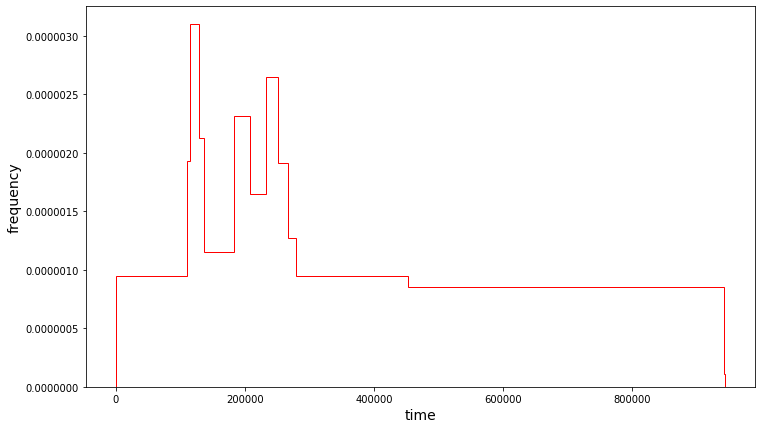

In [1]:
'''
Xola Ndaliso - 2019
Implementation of bayesian blocks and 
Gaussian processes
'''

import numpy as np
import pylab as pl
from astropy.stats import bayesian_blocks
from astroML.plotting import hist

data = np.loadtxt('tteascii00551.txt')
nn = data[0].ravel()
pl.figure(figsize = (12, 7))
hist(nn, bins = bayesian_blocks(data[0], fitness = 'events', p0 = 0.01), color='red',
          histtype = 'step', normed = True)

pl.xlabel('time', fontsize = 14)
pl.ylabel('frequency', fontsize = 14)
pl.show()

 Use astropy.visualization.hist instead. [astroML.utils.decorators]
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise compar

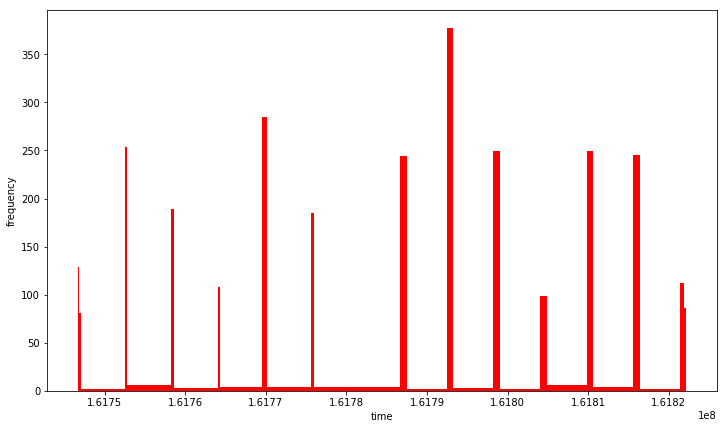

In [16]:
t, x_pix, y_pix = [], [], []

with open('sw00035093001xpcw2po_cl.events.txt', 'r') as sw:
    for _ in range(4):
        next(sw)
    for line in sw:
        t.append(float(line.split()[1]))
        x_pix.append(float(line.split()[2]))
        y_pix.append(float(line.split()[3]))

t = np.array(t)

pl.figure(figsize = (12, 7))
hist(t, bins = bayesian_blocks(t, fitness = 'events', p0 = 0.1), color = 'red',
          histtype = 'stepfilled')
pl.xlabel('time')
pl.ylabel('frequency')
pl.show()

 Use astropy.visualization.hist instead. [astroML.utils.decorators]
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if bins in ['blocks']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['knuth', 'knuths']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif bins in ['scott', 'scotts']:
/home/xoks/anaconda3/lib/python3.6/site-packages/astroML/plotting/hist_tools.py:73: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise compar

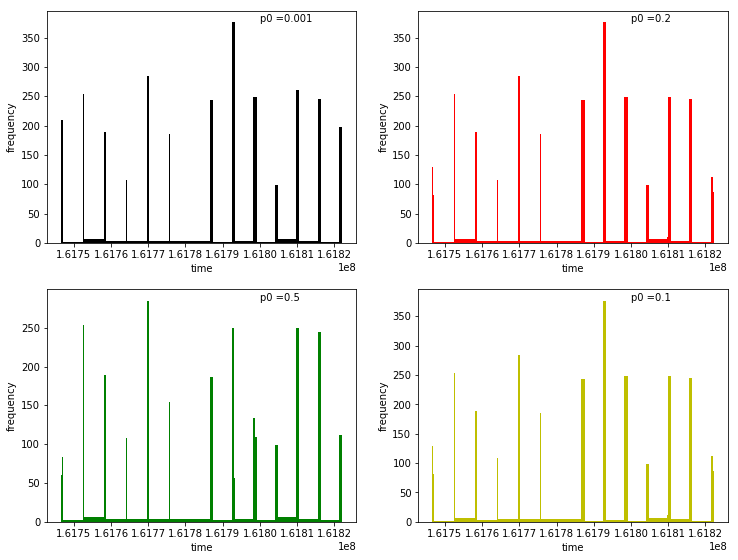

In [15]:
p0 = [0.001, 0.2, 0.5, 0.1]
c = ['k', 'r', 'g', 'y']
for i in range(len(p0)):
    pl.subplot(220 + i + 1)
    hst = hist(t, bins = bayesian_blocks(t, fitness = 'events', p0 = p0[i]), color = c[i],
          histtype = 'stepfilled')
    pl.text(1.6180e8, np.max(hst[0]), 'p0 =' +str(p0[i]))
    pl.xlabel('time')
    pl.ylabel('frequency')

pl.subplots_adjust(top = 1.9, right = 1.7)
pl.show()

### $\textit{2.3}$

In [5]:
N_blcks = len(bayesian_blocks(t, fitness = 'events', p0 = 0.1))
P = (0.1)*(0.01)**(N_blcks)
print('Prior = ', P)

Prior =  1.0000000000000007e-59


###  The formalism of Coram 2002 foo calculating prior was employed. This is given as follows:
P(N$_{blocks}$) = P$_0$$\gamma^{N_{blocks}}$

### Likelihood is determined as the natural logarithm of a gaussian, this is given as: 
$\mathcal{L}$(D|$\Theta$) = -$\Sigma$(ln($\frac{1}{\sqrt(2\pi \sigma^2)}$) - $\frac{(D - \Theta)^2}{2\sigma^2}$)

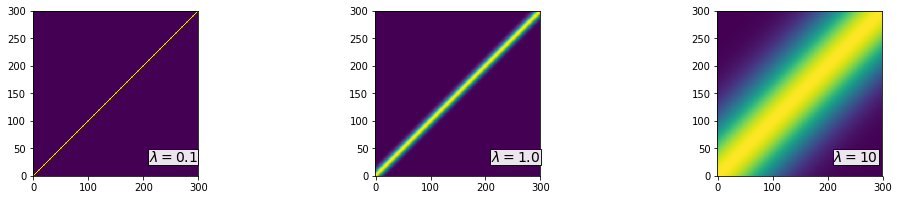

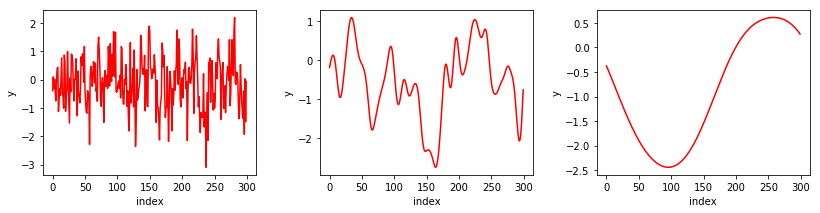

In [3]:
import numpy as np
import pylab as pl

x_1 = np.linspace(0, 30, 300)

def cov_kernel(x1, x2, h, lam):
    
    return (h**2.)*np.exp((-(x1 - x2)**2)/(lam)**2.)

def k(x_n, h, lam):
    
    cov = np.empty((len(x_n), len(x_n)))
    
    for i in range(len(x_n)):
        for j in range(len(x_n)):
            cov[i][j] = cov_kernel(x_n[i], x_n[j], h, lam)
    return cov

lam = [0.1, 1.0, 10]

for i in range(len(lam)):
    pl.subplot(330 + i + 1)
    pl.imshow(k(x_1, 1, lam[i]), origin = 'lower')
    pl.text(210, 25, '$\lambda = $'+str(lam[i]), bbox={'facecolor':'White', 'alpha':0.9, 'pad':0.6}, fontsize = 14)
    
pl.subplots_adjust(right = 2.5, top = 2.3, wspace = 0.001, hspace = 0.4)
pl.show()

for i in range(len(lam)):
    pl.subplot(330 + i + 1)
    y = np.random.multivariate_normal(np.zeros(len(x_1)), k(x_1, 1, lam[i]))
    pl.plot(y, 'r-')
    pl.ylabel('y')
    pl.xlabel('index')

pl.subplots_adjust(right = 1.9, top = 2.3, wspace = 0.3, hspace = 0.4)
pl.show()

As the value of $\lambda$ increases the pattern of the distribution becomes more clear.

### $\textit{With first 5 points}$

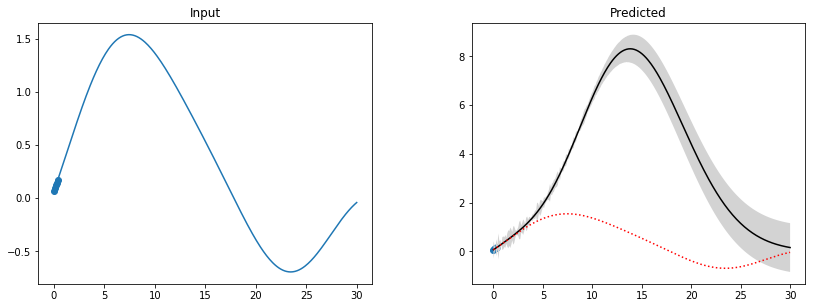

In [10]:
y_train, y_test = y[:5], y[:]
x_train, x_test = x_1[:5], x_1[:]

cov_train = k(x_train, 1, 10)
inv_cov_train = np.linalg.inv(cov_train)

mean, sig = [], []

for i in x_test:
    #1d covariance
    K_x = cov_kernel(i, x_train, 1, 10)
    
    kern = cov_kernel(i , i, 1, 10)
    
    mn = np.dot(K_x.T, np.dot(inv_cov_train, y_train))
    var = kern - np.dot(K_x.T, np.dot(inv_cov_train, K_x))
    
    mean.append(mn)
    sig.append(np.sqrt(np.abs(var)))
    
mean, std = np.array(mean), np.array(sig)
pl.figure()
pl.subplot(221, title = 'Input')
pl.scatter(x_train, y_train)
pl.plot(x_1, y)

pl.subplot(222, title = 'Predicted')
pl.plot(x_test, mean, 'k-')
pl.plot(x_test, y_test, ls = ':', c = 'r')
pl.scatter(x_train, y_train)
pl.fill_between(x_test, mean - std, mean + std, facecolor = 'lightgrey')

pl.subplots_adjust(right = 1.9, top = 2.3, wspace = 0.3, hspace = 0.4)
pl.show()

### $\textit{With randomly selected points}$

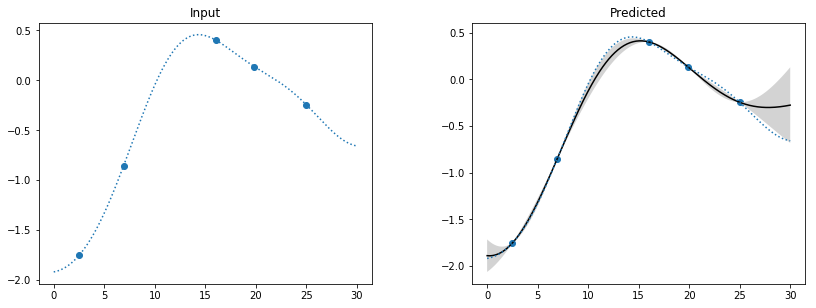

In [14]:
y = np.random.multivariate_normal(np.zeros(len(x_1)), k(x_1, 1, 10))

train = 5

rand = np.random.uniform(low  =0.0, high = 300.0, size = train)
rand = rand.astype(int)
 
condition = np.zeros_like(x_1)
for i in rand: 
    condition[i] = 1.0

y_train = y[np.where(condition==1.0)]
x_train = x_1[np.where(condition==1.0)]
y_test = y[np.where(condition==0.0)]
x_test = x_1[np.where(condition==0.0)]

#y_train, y_test = y[:5], y[6:]
#x_train, x_test = x_1[:5], x_1[6:]

cov_train = k(x_train, 1, 10)
inv_cov_train = np.linalg.inv(cov_train)

mean, sig = [], []

for i in x_test:
    #1d covariance
    K_x = cov_kernel(i, x_train, 1, 10)
    
    kern = cov_kernel(i , i, 1, 10)
    
    mn = np.dot(K_x.T, np.dot(inv_cov_train, y_train))
    var = kern - np.dot(K_x.T, np.dot(inv_cov_train, K_x))
    
    mean.append(mn)
    sig.append(np.sqrt(np.abs(var)))
    
mean, std = np.array(mean), np.array(sig)
pl.figure()
pl.subplot(221, title = 'Input')
pl.scatter(x_train, y_train)
pl.plot(x_1, y, ls = ':')

pl.subplot(222, title = 'Predicted')
pl.plot(x_test, mean, 'k-')
pl.plot(x_test, y_test, ls = ':')
pl.scatter(x_train, y_train)
pl.fill_between(x_test, mean - std, mean + std, facecolor = 'lightgrey')

pl.subplots_adjust(right = 1.9, top = 2.3, wspace = 0.3, hspace = 0.4)
pl.show()

### $\textit{3.6}$

### $\textit{Possible Periodic Kernel}$

In [9]:
def period_kernel(x1, x2, P):
    
    #**this is taken from George kernels**
    #P - is the period of the data
    #x - is the data
    
    return np.cos((2*np.pi/P)*np.abs(x1 - x2))